In [2]:
import pandas as pd

# Load your file
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')

# Show first few rows
print(df.head())

# Show column info
print(df.info())

if 'diagnosis' in df.columns:
    print("Unique values in diagnosis column:", df['diagnosis'].unique())
else:
    print("Columns available:", df.columns)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

Encoded labels: [1 0]
Features shape: (569, 30)
Labels shape: (569,)
=== Linear Kernel SVM ===
Accuracy: 0.9005847953216374
Confusion Matrix:
 [[103   5]
 [ 12  51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       108
           1       0.91      0.81      0.86        63

    accuracy                           0.90       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171

=== RBF Kernel SVM ===
Accuracy: 0.9064327485380117
Confusion Matrix:
 [[103   5]
 [ 11  52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       108
           1       0.91      0.83      0.87        63

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



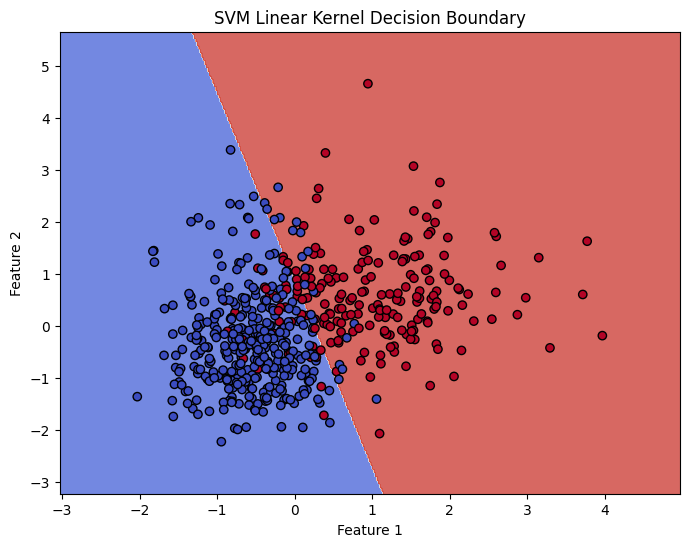

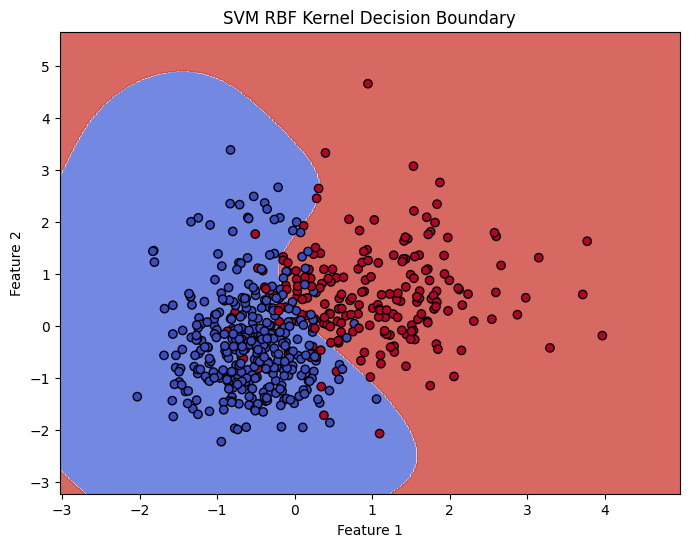

Best Parameters from GridSearchCV: {'C': 100, 'gamma': 0.01}
=== Best RBF Kernel SVM after GridSearch ===
Test Accuracy: 0.9064327485380117
Confusion Matrix:
 [[102   6]
 [ 10  53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       108
           1       0.90      0.84      0.87        63

    accuracy                           0.91       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171

Cross-validation Accuracy Scores: [0.9        0.9        0.975      0.84810127 0.88607595]
Mean CV Accuracy: 0.9018354430379747


In [5]:
# ==========================
# Breast Cancer SVM Analysis
# ==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load dataset
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')


if 'id' in df.columns:
    df = df.drop(['id'], axis=1)


if 'diagnosis' in df.columns:
    le = LabelEncoder()
    df['diagnosis'] = le.fit_transform(df['diagnosis'])
    print("Encoded labels:", df['diagnosis'].unique())

# Separate features and labels
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# For visualization, use only first two features
X_vis = X[:, :2]

# Standardize features
scaler = StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_vis_scaled, y, test_size=0.3, random_state=42)

# ===========================
# 2. Train SVM with linear kernel
# ===========================
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("=== Linear Kernel SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))


svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("=== RBF Kernel SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))


def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot linear kernel decision boundary
plot_decision_boundary(svm_linear, X_vis_scaled, y, "SVM Linear Kernel Decision Boundary")

# Plot RBF kernel decision boundary
plot_decision_boundary(svm_rbf, X_vis_scaled, y, "SVM RBF Kernel Decision Boundary")


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:", grid.best_params_)

# Evaluate best model
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("=== Best RBF Kernel SVM after GridSearch ===")
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# ===========================
# 6. Cross-validation accuracy
# ===========================
scores = cross_val_score(best_svm, X_train, y_train, cv=5)
print("Cross-validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))
